In [1]:
%matplotlib inline


# Regression

The following example shows how to fit a simple regression model with
*auto-sklearn*.


In [2]:
from pprint import pprint

import sklearn.datasets
import sklearn.metrics

import autosklearn.regression
import matplotlib.pyplot as plt

/home/peng/opt/anaconda3/envs/autosl/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data Loading



In [3]:
X, y = sklearn.datasets.load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, random_state=1
)

## Build and fit a regressor



In [4]:
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    memory_limit=16384,
    tmp_folder="/tmp/autosklearn_regression_example_tmp",
)
automl.fit(X_train, y_train, dataset_name="diabetes")

AutoSklearnRegressor(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                     memory_limit=16384, per_run_time_limit=30,
                     time_left_for_this_task=120,
                     tmp_folder='/tmp/autosklearn_regression_example_tmp')

## View the models found by auto-sklearn



In [5]:
print(automl.leaderboard())

          rank  ensemble_weight            type      cost  duration
model_id                                                           
25           1             0.26             sgd  0.436679  0.279130
68           2             0.08             mlp  0.438377  0.243181
57           3             0.14             sgd  0.449293  0.233239
6            4             0.18  ard_regression  0.455042  0.277620
43           5             0.14  ard_regression  0.460144  0.302321
60           6             0.16        adaboost  0.536267  0.301813
32           7             0.04   liblinear_svr  0.819586  0.235377


## Print the final ensemble constructed by auto-sklearn



In [6]:
pprint(automl.show_models(), indent=4)

{   6: {   'cost': 0.4550418898836528,
           'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7741e73633d0>,
           'ensemble_weight': 0.18,
           'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7741e756ccd0>,
           'model_id': 6,
           'rank': 1,
           'regressor': <autosklearn.pipeline.components.regression.RegressorChoice object at 0x7741e756cd90>,
           'sklearn_regressor': ARDRegression(alpha_1=0.0003701926442639788, alpha_2=2.2118001735899097e-07,
              copy_X=False, lambda_1=1.2037591637980971e-06,
              lambda_2=4.358378124977852e-09,
              threshold_lambda=1136.5286041327277, tol=0.021944240404849075)},
    25: {   'cost': 0.43667876507897496,
            'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7741e7363f10>,
            'ensem

## Get the Score of the final ensemble
After training the estimator, we can now quantify the goodness of fit. One possibility for
is the [R2 score](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score).
The values range between -inf and 1 with 1 being the best possible value. A dummy estimator
predicting the data mean has an R2 score of 0.



In [7]:
train_predictions = automl.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = automl.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

Train R2 score: 0.6661131627924907
Test R2 score: 0.3812544495527469


## Plot the predictions
Furthermore, we can now visually inspect the predictions. We plot the true value against the
predictions and show results on train and test data. Points on the diagonal depict perfect
predictions. Points below the diagonal were overestimated by the model (predicted value is higher
than the true value), points above the diagonal were underestimated (predicted value is lower than
the true value).



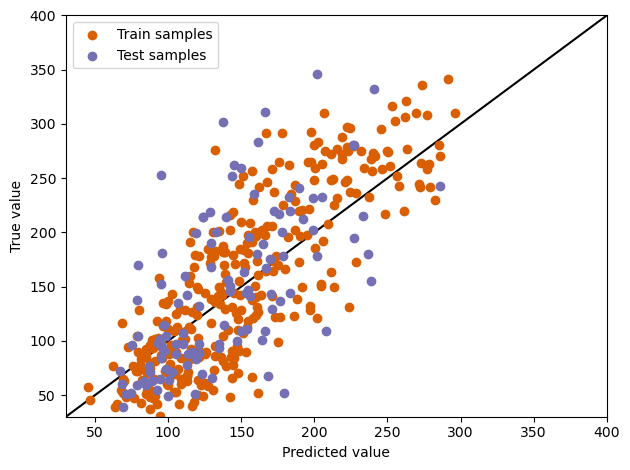

In [8]:
plt.scatter(train_predictions, y_train, label="Train samples", c="#d95f02")
plt.scatter(test_predictions, y_test, label="Test samples", c="#7570b3")
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([30, 400], [30, 400], c="k", zorder=0)
plt.xlim([30, 400])
plt.ylim([30, 400])
plt.tight_layout()
plt.show()